# Clustering using IDEC
Paper: https://www.ijcai.org/proceedings/2017/0243.pdf

Note: the training of the model is done on a GUI-powered platform developed by the author

In [2]:
# load precessed training dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_pickle("../data/train.pkl")
df.tail()

,company_name,homepage_url,country_code,city,short_description,description,employee_count,weeks_founded,company_uuid,weeks_founded_quant,...,funding_total_usd,funding_total_usd_quant,funding_rounds,last_funding_week,last_funding_week_quant,last_funding_usd,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp
563742,SDC Solutions,com,USA,Manchester,Communications Software Provider,"SDC Solutions, Inc., formerly System Developme...",501-1000,1814.000000,78730ded-24a9-b5ef-d11c-72b4fbd17fd6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
563743,Advantaa Computer,,USA,Santa Ana,Advantaa Computer is operates in stealth mode.,Advantaa Computer is operates in stealth mode.,unknown,39.857143,1de43cee-8d3c-475b-aa12-6ad68dc83c27,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
563744,Thoughty,com,USA,Santa Ana,Thoughty is a mobile application that uses loc...,Social media is here to stay and consumers aro...,1-10,250.714286,25204d2d-07d6-6d1c-6fb5-fcd8594503a3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
563745,"Moolah, llc",cc,USA,Capistrano Beach,Accept Payments Everywhere. No Setup Fees. No ...,NaN,11-50,340.571429,86be00ad-9d43-93ae-1ace-811eb2e9cc08,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
563746,Universal Solutions Of North America,,USA,Charleston,Universal Solutions Of North America provides ...,Universal Solutions Of North America provides ...,unknown,1083.428571,aa18f7f4-d333-b75d-adf4-0204789b0415,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",...,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,NaN,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1


## Feature selction and formatting
The data need to be in Bigquery for a platform to work on.

In [11]:
df = df[['company_uuid', 'weeks_founded_quant', 'employee_count_quant', 
         'funding_total_usd_quant', 'funding_rounds', 'last_funding_week_quant', 
         'last_funding_usd_quant', 'invest_phase_overall', 'last_funding_ratio', 
         'last_funding_ratio_imp']]
df.head()

,company_uuid,weeks_founded_quant,employee_count_quant,funding_total_usd_quant,funding_rounds,last_funding_week_quant,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp
0,51d72ce7-3075-b4d9-941f-8a90b23c9c14,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
1,62a90659-df0d-0ff8-c30e-b393bdbbb490,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
2,fd8e506a-5190-df18-1e56-fd7ca05af161,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
3,bfc7b9b4-9016-d808-7224-46f541a4fb64,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1
4,672d87af-4eeb-ddc9-778e-97b0750538ae,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",-1.0,1


In [15]:
with open('idec.json', 'w') as f:
    f.write(df.to_json(orient='records')[1:-1].replace('},{', '}\n{'))

## The training is carried out on a ML-platform developed by the author
- Author's adapted code: https://github.com/caolele/DCEC_pureTF/blob/master/TF_DCEC.py 
- It will be demostrated in the readme
- the prediction result is exported to BQ and then as a json file
- No whatsoever hparams tuning; they are set to empirically values on other datasets.

## Evaluation

In [5]:
dff = pd.read_json('./idec_pred.json', lines = True)
dff.head(n=5)

,company_uuid,cluster,index,code
0,54a45447-cc4a-e2e9-7cb7-94a9afb4db20,0,320741,"[0.2672119140625, 1.513350129127502, 1.9376901..."
1,6f02255e-9a6d-93d0-59b0-aa5343302ef7,0,563556,"[-0.5682373046875, 3.094779968261718, 2.378072..."
2,573bb720-d72d-614a-9c9b-715875b83a7c,0,174126,"[-1.38818359375, 0.5858278870582581, 2.9548745..."
3,1f905bdb-a340-d417-b30f-e600d4f14048,0,299530,"[1.489371061325073e-05, 0.749664068222045, 2.0..."
4,39525aed-bebc-4027-bc52-8a55f06aab7c,0,237041,"[0.33184814453125, 2.33288025856018, 1.6628370..."


In [12]:
dff_sample = dff.sample(n = 2000) 
z = pd.DataFrame(list(dff_sample.iloc[:,3]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.339405,0.265845,1.549798,0.426915,-0.991374,0.610183,-1.336559,1.385425,-0.443899,1.065537,-0.165791,-0.264760,0.182749,0.600199,-0.793320,-0.634718
1,1.572571,1.726927,1.181816,-0.008638,-2.288476,1.750402,-0.849512,-0.759621,-0.645378,-0.572776,-1.516461,-0.539501,0.745920,0.355796,0.477474,0.873921
2,-0.087826,1.379228,1.908149,-0.855656,-0.716561,-0.679361,1.824643,1.709584,0.512100,-0.080694,1.237827,1.798884,-1.955151,-0.874649,-0.278883,0.532582
3,-2.439193,3.506554,2.852899,-2.197525,1.180743,-2.098932,2.329183,-0.606192,0.957464,-0.955535,0.383500,-1.221882,-4.981815,-2.367620,1.703900,0.365591
4,1.106302,0.776811,1.741534,0.358046,-1.341361,1.218744,-1.099618,0.614005,-0.051895,0.441459,-0.714891,-0.437636,0.492038,0.090314,-0.517492,-0.847014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.339405,0.265845,1.549798,0.426915,-0.991374,0.610183,-1.336559,1.385425,-0.443899,1.065537,-0.165791,-0.264760,0.182749,0.600199,-0.793320,-0.634718
1996,0.421574,0.314111,1.553098,0.414882,-1.013045,0.680213,-1.309264,1.305250,-0.415211,0.991823,-0.219271,-0.273268,0.221476,0.539068,-0.757910,-0.645915
1997,0.339405,0.265845,1.549798,0.426915,-0.991374,0.610183,-1.336559,1.385425,-0.443899,1.065537,-0.165791,-0.264760,0.182749,0.600199,-0.793320,-0.634718
1998,0.859290,0.405883,0.976409,-0.266095,-1.638679,-0.218992,0.382976,0.453499,-0.714026,1.742118,-1.490478,0.650357,0.502136,1.704953,1.701792,-0.029987


### TSNE Visualization of encoding

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
tsne_res = tsne.fit_transform(z)
res_pd = pd.DataFrame(tsne_res)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.207165
[t-SNE] KL divergence after 1000 iterations: 0.168749


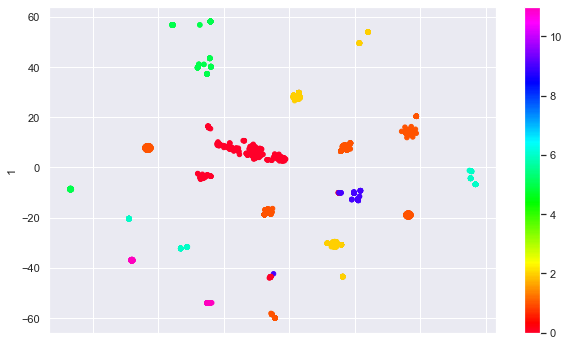

In [17]:
colors = dff_sample.iloc[:,1].values
res_pd = pd.DataFrame(tsne_res)
sns.set(rc={'figure.figsize':(10,6)})
res_pd.plot.scatter(x=0, y=1, c=colors, colormap='gist_rainbow')

## Explain the clusters
Due to limited time, only one illustration is provided

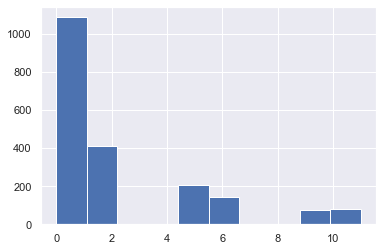

In [22]:
# cluster balancing
sns.set(rc={'figure.figsize':(6,4)})
g=dff_sample['cluster'].hist()

In [117]:
zf = pd.merge(df, dff, on='company_uuid', how='left')
print(zf.shape)

(563747, 34)


### Distplot: cluster vs. features
Due to limited time, only a few examples are illustrated here

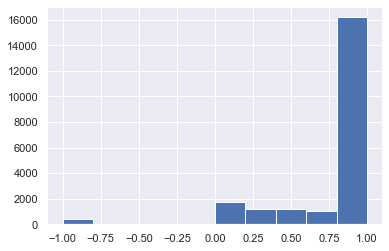

In [94]:
zf[zf.cluster==9]['last_funding_ratio'].hist()

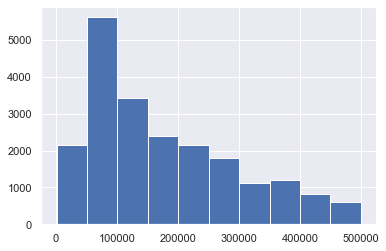

In [99]:
zf[zf.cluster==9]['last_funding_usd'].hist()

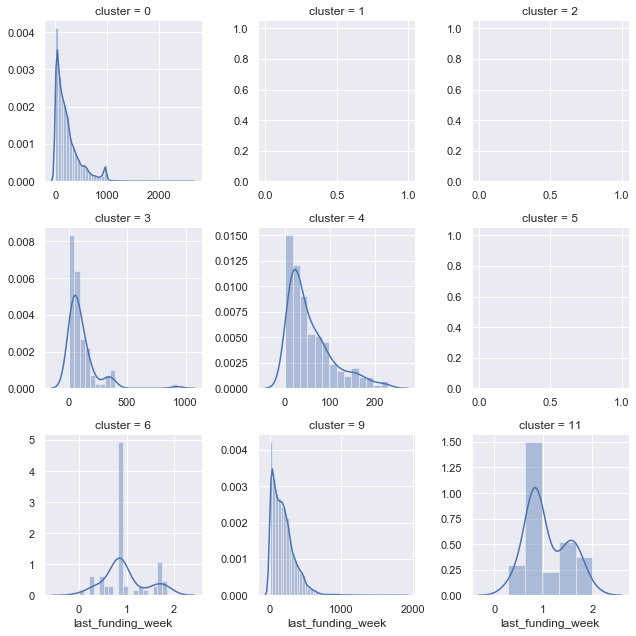

In [96]:
g = sns.FacetGrid(zf, col="cluster", col_wrap=3, sharex=False, sharey=False)
g.map(sns.distplot, "last_funding_week")

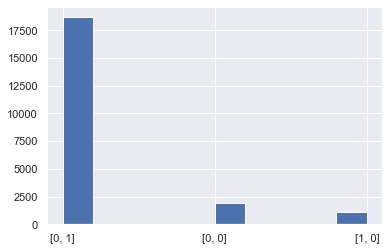

In [100]:
zf[zf.cluster==9]['invest_phase_overall'].apply(str).hist()
# Note that [0, 1] refers to pre A/B series

### Cluster 9 seems to be an interesting group
Further filter on last_funding_week

In [118]:
zf = zf[zf.cluster == 9]
zf = zf[zf.last_funding_week <= 6]
zf = zf[zf.last_funding_usd > 50000]
zf = zf[zf['invest_phase_overall'].apply(lambda x: x == [0, 1])]
zf = zf[zf.last_funding_ratio > 0.5]
zf

,company_name,homepage_url,country_code,city,short_description,description,employee_count,weeks_founded,company_uuid,weeks_founded_quant,...,last_funding_week,last_funding_week_quant,last_funding_usd,last_funding_usd_quant,invest_phase_overall,last_funding_ratio,last_funding_ratio_imp,cluster,index,code
550,Virtuleap,com,PRT,Lisbon,VR Brain Training for Cognitive Health,Virtuleap's VR brain training app offers a dai...,1-10,35.714286,b0ac15fc-b536-1e6d-53a5-e8bbf68d5f17,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,1.714286,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",125000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.714286,0,9,222373,"[-1.871609807014465, 4.278001308441162, 2.3050..."
1596,Cognicept Systems,systems,SGP,Singapore,We step in when robots get confused. We provid...,Cognicept provides Human-in-the-loop (HITL) er...,1-10,5.142857,1fd49a37-3582-4b72-b926-71046b8ccb2f,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,3.142857,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",100000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0,9,397555,"[-2.763867855072021, 4.338231563568115, 2.3154..."
2480,Fortuna.ai,ai,CAN,Toronto,AI platform simplifying your client experience,Fortuna is an AI-powered customer creation pla...,11-50,92.000000,6f8791d1-62ae-444c-bdfb-9fe98789011a,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",...,5.857143,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",125000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.781250,0,9,156579,"[-2.775979995727539, 4.102198123931884, 2.3222..."
4083,Abanza Tecnomed,com,ESP,Mutilva Alta,Abanza Tecnomed provides research and developm...,Abanza Tecnomed provides research and developm...,1-10,248.571429,d4783755-6e4e-476e-ae1d-707f010c3795,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,5.142857,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",82941.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0,9,518423,"[-2.548594236373901, 3.569749355316162, 2.8620..."
5600,Blank Slate Technologies,com,USA,Arlington,Blank Slate Technologies provides effective le...,Blank Slate Technologies provides effective le...,unknown,92.000000,11885b2e-2285-4c05-8e55-a2cff6e34bd1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",...,2.285714,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",125000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0,9,173011,"[-2.771705389022827, 4.135543346405029, 2.2272..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558995,ThermoAI,com,,,Artificial intelligence that reduces global em...,ThermoAI uses patent-pending proprietary machi...,1-10,13.571429,92182e39-4c85-4d68-a8d0-a2283d530ff3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,2.857143,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",120000.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.783372,0,9,540962,"[-2.716541290283203, 4.285706996917724, 2.4887..."
560142,Socialease,ch,CHE,Genève,Socialease is AI software that turns SMEs soci...,Socialease is AI software that turns SMEs soci...,unknown,39.857143,23a64acf-b9ae-4058-843e-78a6534f9117,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,5.428571,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",51611.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",0.631389,0,9,158460,"[-2.707606315612793, 4.133121490478515, 2.4639..."
561156,nSpireMe,uk,GBR,London,nSpireMe is a music practice app.,nSpireMe helping children supercharge their vi...,1-10,39.857143,814b15f5-6da6-4d7f-b9fc-1867919f07e7,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",...,4.714286,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",385735.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0,9,71761,"[-2.428410053253173, 4.213324546813964, 2.4929..."
561495,InCaseIT,com,NOR,Lysaker,InCaseIT is a mobile and cloud-based crisis ma...,InCaseIT is a mobile and cloud-based crisis ma...,1-10,300.714286,03b76f44-6b8f-450c-9b3d-4fbe5952711a,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",...,5.142857,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",82941.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 1]",1.000000,0,9,531990,"[-2.548594236373901, 3.569749355316162, 2.8620..."


### Check company profile semantics

In [119]:
#r5: Semantic Similarity
import pickle
infile = open('../model/semdb_model.pkl','rb')
model = pickle.load(infile)
infile.close()

from bfs import filter_on_similarity
focus_orgs = filter_on_similarity(zf, model)
print('Found {} groups of companies that may be of interest!'.format(len(focus_orgs)))

BFSing ...
Found 1 groups of companies that may be of interest!


In [124]:
# Sample several companies for each group
frames = []
seq_no = 1
for group in focus_orgs:
    n = len(group)
    # idx = np.random.choice(n, 3, replace=False)
    print('Group {}: Total {} companies.'.format(seq_no, n))
    # focus_orgs_list = focus_orgs_list.union(group)
    print(df.loc[list(group)[:10]]['short_description'].to_string())
    
    tmp = pd.DataFrame(list(group), columns =['id'])
    tmp['group'] = [seq_no for _ in range(n)]
    frames.append(tmp)
    
    seq_no += 1
    
focus_orgs_df = pd.concat(frames)

Group 1: Total 27 companies.
537090    DART Diagnostics work with the purpose of impr...
558995    Artificial intelligence that reduces global em...
298132    PVOH Polymers is a materials supply and develo...
226964    Allero Therapeutics is a biopharmaceutical com...
56223      Olaregen Therapeutix is a Biotechnology company.
266403    Smart sports insole that generates real-time d...
27045     Neurosteer is a medical-grade wearable device ...
550                  VR Brain Training for Cognitive Health
547880    US intelligence agency-grade forensic analysis...
57907     Moirai Biodesign is developing RNA technologie...


## Test on the hold-out data¶

In [130]:
uuid_holdout = list(zf.loc[list(focus_orgs_df['id'])]['company_uuid'])
sql = """
SELECT
  SUM(raised_amount_usd)
FROM
  `proj.leleca.mbt_funding`
WHERE
  announced_on > "2018-10-07"
  AND company_uuid IN ("{}")
""".format('","'.join(map(str, uuid_holdout)))
print(sql)
usd_sum_holdout_selected = 5483785
n_orgs_holdout_selected = 17 # len(uuid_holdout)
print('Selected companies ({}) obtain a total of USD = {}'.format(n_orgs_holdout_selected, usd_sum_holdout_selected))


SELECT
  SUM(raised_amount_usd)
FROM
  `proj.leleca.mbt_funding`
WHERE
  announced_on > "2018-10-07"
  AND company_uuid IN ("3c4e33fe-dc5e-47d4-b1f0-0f267139946f","92182e39-4c85-4d68-a8d0-a2283d530ff3","d9bd4cbd-71c6-4e6e-927f-24c41e00aa81","e4fc1ac1-90e0-48be-91b1-1217d9b9f91a","68663ca1-a9f4-43b2-8201-d1843541adad","91238112-56f2-c54a-cdf0-af3a7b2526be","4d68fb53-b6cc-91e1-abfb-0affe26f11aa","b0ac15fc-b536-1e6d-53a5-e8bbf68d5f17","7aeaafa9-304c-40b9-afea-377a299d58af","15318cbb-76e4-0588-8a37-c2c35b2cbb6b","733492eb-a19d-4c6b-a936-67a2e28ad8b5","cf4d0537-9ff3-47f1-a9bf-a68c07efee72","1fd49a37-3582-4b72-b926-71046b8ccb2f","20e4e717-4e8d-a922-e4df-0eadde226c9b","dbdd1e71-0b57-4716-8ec6-fa31cdd1d437","21d57cb4-ebb9-4b6e-f567-44a4aa2d5480","27275316-d89c-4319-8e26-53d1f309a5b6","2351584e-d8f8-4038-8984-8c2f86525e5a","4be4e409-04c4-46e1-bfdb-e8153146ceae","fd11b67d-cc7b-4243-804e-2285769d77f8","0ac35679-63ed-46b3-8a49-c6b7334cdb3c","504511ca-cf1c-46cd-93cd-1078afc530bb","93b10dd4-f98f-4c

In [129]:
n_orgs_holdout_preab, usd_sum_holdout_preab, avg_original = 14119, 22460304700.0, 1590785.7992775692

print('1. Percentage of USD for the selected companies: {} %'.format(usd_sum_holdout_selected*100/usd_sum_holdout_preab))
avg_selected = usd_sum_holdout_selected/n_orgs_holdout_selected
print('2. Average USD for the selected companies: {}, which is {} times of average.'.format(
    avg_selected, avg_selected/avg_original))
# Probably look into 1 month is too short for enough money to come in?
print('3. Among the selcted companies, {} % actually received funds afterwards.'.format(
    n_orgs_holdout_selected*100/len(uuid_holdout)))


1. Percentage of USD for the selected companies: 0.02441545238698387 %
2. Average USD for the selected companies: 322575.5882352941, which is 0.20277751308930897 times of average.
3. Among the selcted companies, 62.96296296296296 % actually received funds afterwards.
